In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.facecolor'] = 'w'

In [2]:
import random

In [341]:
num_side = 100
X = np.zeros((num_side, num_side))
# X = np.random.rand(50, 50)
X[47, 53] = 1
# X[11, 15] = 1

In [342]:
len(np.nonzero(X)[0])

1

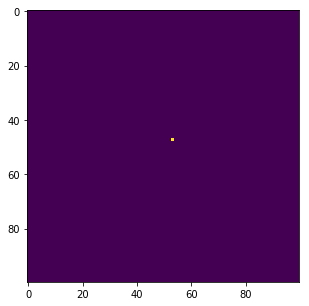

In [343]:
fig, ax = plt.subplots()
fig.set_size_inches(5, 5)
# fig.autofmt_xdate(rotation=45)
im = ax.imshow(X, cmap='viridis', interpolation='nearest')#, vmin=-1, vmax=1)
# fig.colorbar(im)
# ax.set_xticks(np.arange(len(data_fields+['DeltaE'])))
# ax.set_yticks(np.arange(len(data_fields+['DeltaE'])))
# ax.set_xticklabels(data_fields+['DeltaE'])
# ax.set_yticklabels(data_fields+['DeltaE'])
# ax.set_title('Correlation Matrix');

In [344]:
cnt = len(np.nonzero(X)[0])
cnt_lst = [cnt]

In [361]:
for _ in range(10):
    for y,x in zip(np.where(X != 0)[0], np.where(X != 0)[1]):
        for i in range(-1, 2):
            for j in range(-1, 2):
                if (i==0 and j==0):
                    continue
                else:
                    xi, yj = x+i, y+j
                    # avoid beyond boundaries
                    if (xi < 0 or xi >= num_side or yj < 0 or yj >= num_side):
                        continue
                    else:
                        if X[yj, xi] == 1:  # ignore if already infected
                            continue
                        else:
                            contagion = contact(prob=0.1)
                            X[yj, xi] = contagion
                            if contagion == 1:
                                cnt += 1
    cnt_lst.append(cnt)
# print(cnt, len(cnt_lst))

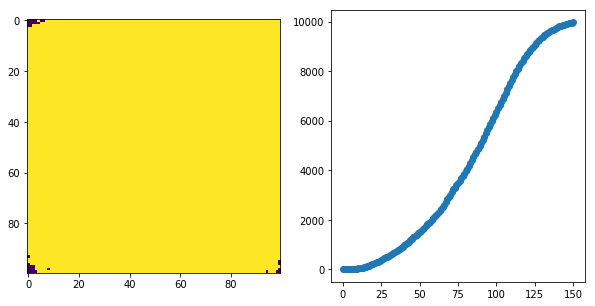

In [362]:
fig, ax = plt.subplots(1, 2)
fig.set_size_inches(10, 5)
ax[0].imshow(X, cmap='viridis', interpolation='nearest')#, vmin=-1, vmax=1)
ax[1].plot(cnt_lst, 'o-');
# ax[1].set_yscale('log');

In [75]:
def contact(prob):
    rnd_nr = random.random()
    if rnd_nr <= prob:
        rtn = 1
    else:
        rtn = 0
    return rtn

In [251]:
cnt_lst

[2, 5]

In [68]:
int_ = []
for _ in range(10000):
    int_.append(interaction(0.2))
np.mean(int_)

0.1956